# FashionMNIST Project

For this project, I have build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Version: ", tf.__version__)

Version:  2.9.2


In [ ]:
# Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes with softmax activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy()` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, test_images.shape, train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Shape of the image: (28, 28)


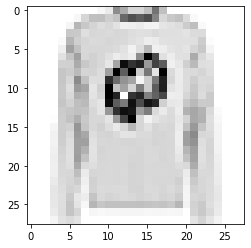

In [ ]:
idx = 123
image = train_images[idx, :, :] 
print("Shape of the image:", image.shape)
plt.imshow(image, cmap="Greys")

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

In [ ]:
ind = 1234
pro = model(train_images[ind:ind+2]) 
print(pro)


tf.Tensor(
[[0.02647399 0.17056286 0.06899049 0.10697915 0.02470008 0.12708098
  0.08073147 0.15516877 0.06535836 0.17395386]
 [0.06837548 0.10996656 0.08485672 0.09040853 0.07442552 0.09340221
  0.1079322  0.13557684 0.11990286 0.11515305]], shape=(2, 10), dtype=float32)


In [ ]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
loss_func(train_labels[ind:(ind+2)], pro).numpy()

2.549355

In [ ]:
model.compile(optimizer='sgd',
              loss=loss_func,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7502 - accuracy: 0.7627
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5114 - accuracy: 0.8266
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4667 - accuracy: 0.8390
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8465
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4239 - accuracy: 0.8538
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4094 - accuracy: 0.8581
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3989 - accuracy: 0.8616
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3887 - accuracy: 0.8646
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3793 - accuracy: 0.8666
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.371

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8515


[0.4160538613796234, 0.8514999747276306]

In [ ]:
predictions = model.predict(test_images)
classes = np.argmax(predictions, axis=1)


from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, classes)
print(matrix)

313/313 [==============================] - 0s 2ms/step
[[826   5  11  50   1   4  91   0  12   0]
 [  2 961   4  25   2   0   5   0   1   0]
 [ 18   5 816  16  58   1  81   0   5   0]
 [ 21  13  12 892  22   0  34   0   6   0]
 [  1   2 177  52 633   1 127   0   7   0]
 [  0   0   0   1   0 935   0  45   2  17]
 [148   2 109  45  43   1 632   0  20   0]
 [  0   0   0   0   0  32   0 952   0  16]
 [  4   1   9   9   3   3  21   6 944   0]
 [  0   0   0   0   0  15   0  60   1 924]]
